# Прогнозирование количества прокатов

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso,LinearRegression,LogisticRegression,LassoCV
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#Читаем данные
df = pd.read_csv('../data/bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [7]:
#Подготовка данных
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [8]:
#Обучение модели без регуляризации
lin_reg = LinearRegression()
lin_reg.fit(X,y)
list(zip(df.columns,lin_reg.coef_))

[('season', 570.8681698112806),
 ('yr', 1021.9637175294769),
 ('mnth', -141.30232005185658),
 ('holiday', -86.76357810238395),
 ('weekday', 137.2291962130855),
 ('workingday', 56.38823527436251),
 ('weathersit', -330.2316126526911),
 ('temp', 367.4749136050979),
 ('atemp', 585.5563613048682),
 ('hum', -145.60790584172227),
 ('windspeed(mph)', 12458830091266.607),
 ('windspeed(ms)', -12458830091465.062)]

In [9]:
#Обучение модели с l2 регуляризацией
lasso_reg = Lasso()
lasso_reg.fit(X,y)
list(zip(df.columns,lasso_reg.coef_))

[('season', 560.2416160308869),
 ('yr', 1019.4634940657196),
 ('mnth', -128.7306270367875),
 ('holiday', -86.1527813337111),
 ('weekday', 137.34789390496312),
 ('workingday', 55.21237064135672),
 ('weathersit', -332.3698569623486),
 ('temp', 376.3632362096987),
 ('atemp', 576.530793504551),
 ('hum', -144.12915500348606),
 ('windspeed(mph)', -197.1396894024858),
 ('windspeed(ms)', -2.8049811945715987e-08)]

In [10]:
#Обучение модели с l1 регуляризацией
lasso_reg = Lasso()
lasso_reg.fit(X,y)
list(zip(df.columns,lasso_reg.coef_))

[('season', 560.2416160308869),
 ('yr', 1019.4634940657196),
 ('mnth', -128.7306270367875),
 ('holiday', -86.1527813337111),
 ('weekday', 137.34789390496312),
 ('workingday', 55.21237064135672),
 ('weathersit', -332.3698569623486),
 ('temp', 376.3632362096987),
 ('atemp', 576.530793504551),
 ('hum', -144.12915500348606),
 ('windspeed(mph)', -197.1396894024858),
 ('windspeed(ms)', -2.8049811945715987e-08)]

Best alpha:  6


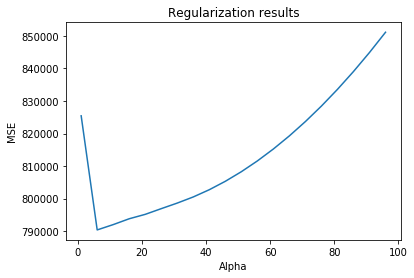

In [11]:
#Подбор параметра регуляризации
alphas = np.arange(1, 100, 5)

l_cv = LassoCV(alphas=alphas)
l_cv.fit(X,y)
l_cv_means = l_cv.mse_path_.mean(axis=1)

plt.plot(l_cv.alphas_,l_cv_means)
plt.title("Regularization results")
plt.xlabel("Alpha")
plt.ylabel("MSE")

print ('Best alpha: ',l_cv.alpha_)